In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from arch.unitroot import VarianceRatio
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [2]:
stock = "THYAO.IS"
index = "XU100.IS"

data = yf.download([stock, index], period="5y", interval="1mo")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [3]:
# fixing data
# Fix bist100 data
# 2020-06
data.loc[:"2020-06", index] = data.loc[:"2020-06", index] / 100

# Fix bist100 missing data
data[index] = data[index].reindex(data[stock].index.values, method="pad")

In [4]:
# Drop last row of df
data.drop(data.tail(1).index, inplace=True)

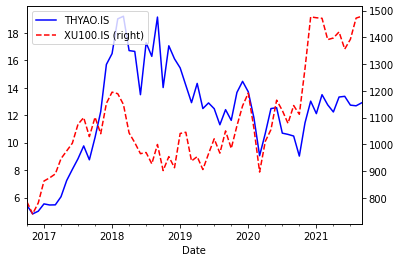

In [5]:
ax1 = data[stock].plot(style="b-")
ax2 = data[index].plot(style="r--", secondary_y=True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

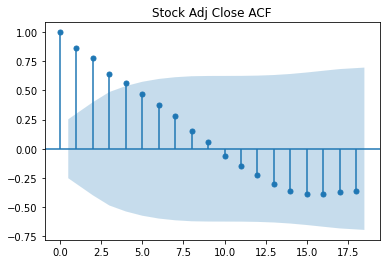

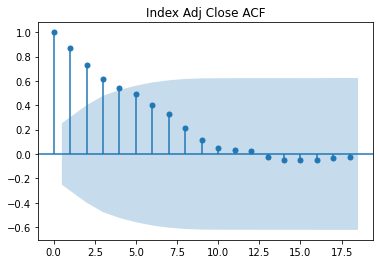

In [6]:
plot_acf(data[stock], title="Stock Adj Close ACF")
plot_acf(data[index], title="Index Adj Close ACF")
plt.show()

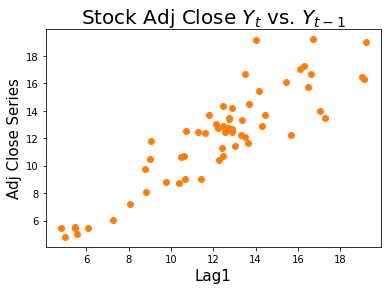

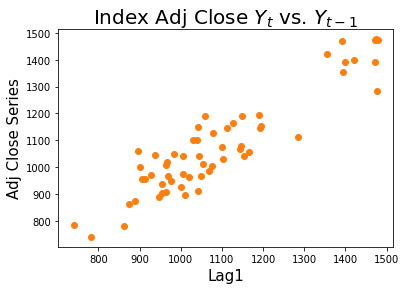

In [7]:
fig, ax = plt.subplots()
_ = ax.scatter(data[stock], data[stock].shift(1), color="C1")
_ = ax.set_xlabel("Lag1", fontsize=15)
_ = ax.set_ylabel("Adj Close Series", fontsize=15)
_ = ax.set_title("Stock Adj Close $Y_t$ vs. $Y_{t-1}$", fontsize=20)

fig, ax = plt.subplots()
_ = ax.scatter(data[index], data[index].shift(1), color="C1")
_ = ax.set_xlabel("Lag1", fontsize=15)
_ = ax.set_ylabel("Adj Close Series", fontsize=15)
_ = ax.set_title("Index Adj Close $Y_t$ vs. $Y_{t-1}$", fontsize=20)

plt.show()

In [8]:
# Returns
data_ret = data.pct_change(1).dropna()

<AxesSubplot:xlabel='Date'>

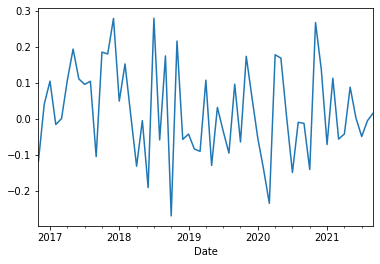

In [9]:
data_ret[stock].plot()

<AxesSubplot:xlabel='Date'>

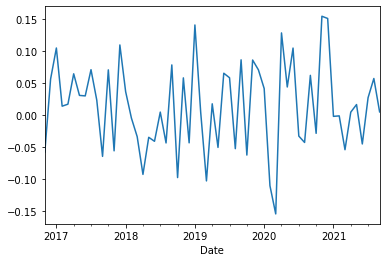

In [10]:
data_ret[index].plot()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


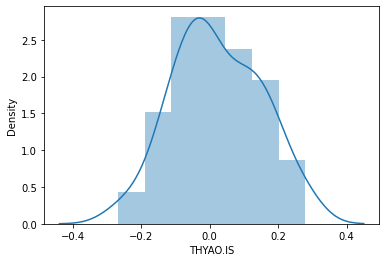

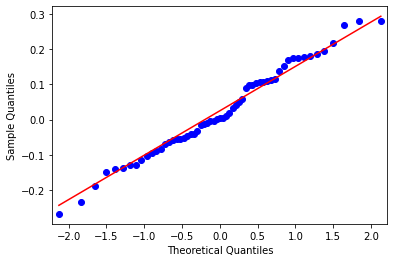

In [11]:
sns.distplot(data_ret[stock])
qqplot(data_ret[stock], line="q")
plt.show()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


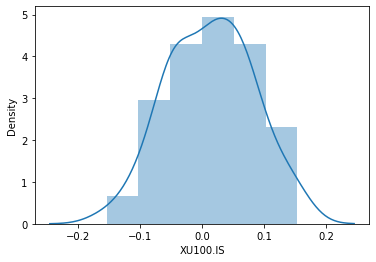

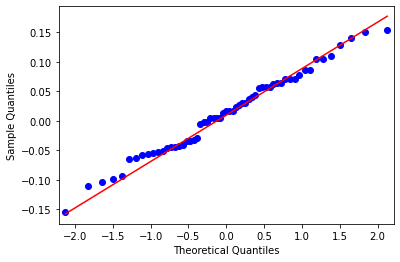

In [12]:
sns.distplot(data_ret[index])
qqplot(data_ret[index], line="q")
plt.show()

In [13]:
vr_res = pd.DataFrame(columns=['Lags', 'Stock_PValues', 'Index_PValues'])

for i in range(2, 25):
    vr_res = vr_res.append({'Lags': i, 'Stock_PValues': VarianceRatio(
        data_ret[stock], i).pvalue, 'Index_PValues': VarianceRatio(data_ret[index], i).pvalue}, ignore_index=True)

vr_res

,Lags,Stock_PValues,Index_PValues
0,2.0,0.000692,0.000086
1,3.0,0.013160,0.002980
2,4.0,0.015257,0.006655
3,5.0,0.024133,0.005229
4,6.0,0.039017,0.016823
5,7.0,0.040735,0.020533
6,8.0,0.072715,0.039125
7,9.0,0.074079,0.053152
8,10.0,0.097541,0.055785
9,11.0,0.105020,0.062074


C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='XU100.IS', ylabel='THYAO.IS'>

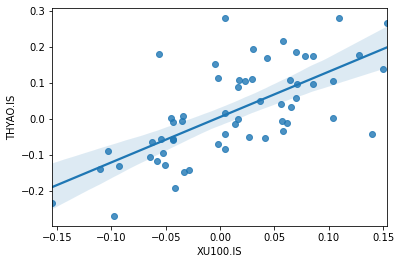

In [14]:
sns.regplot(data_ret[index], data_ret[stock])

In [15]:
# Regression
x = data_ret[index]
x = add_constant(x)
y = data_ret[stock]

lm = OLS(y, x)
results = lm.fit()
results.summary()

C:\Users\murat\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               THYAO.IS   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     48.35
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           3.81e-09
Time:                        23:35:50   Log-Likelihood:                 56.068
No. Observations:                  59   AIC:                            -108.1
Df Residuals:                      57   BIC:                            -104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.013      0.494      0.623      -0.019       0.031
XU100.IS       1.2574      0.181      6.953      0.000       0.895       1.620
==============================================================================
Omnibus:                        3.672   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.711
Skew:                           0.460   Prob(JB):                        0.258
Kurtosis:                       3.506   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""